# K- nearest neighbors Algorithm

### Humberto Mundo

KNN is a supervised machine learning algorithm that is used for predictions. It is widely used for regressions, classifications and recommendations. It is easy to use but very slow, however its simplicity allows for a not so complex model giving us accurate enough predictions.

The way this model works is we feed the model a specific point that represents a value in a dataset. The model then compares it to its "neighbors", who are other points carrying different characteristics. Think of a bunch of points scattered on a graph based on different variables. We calculate the distance between the point we give vs other points, the shorter the distance the more similarity between the points. Once we find the "nearest neighbors" the model will give us the closest points. 

Here is a visual example of how KNN works.

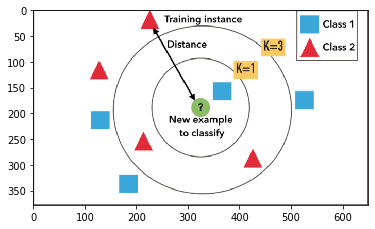

In [26]:
import matplotlib.image as mpimg

img=mpimg.imread('1_OyYyr9qY-w8RkaRh2TKo0w.png')
imgplot = plt.imshow(img)

In [27]:
import numpy as np
import os
import pandas as pd 
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
#file reading help from:
#https://stackoverflow.com/questions/48812580/python-pandas-unicodedecodeerror-utf-8-codec-cant-decode-byte-0xcd-in-pos
def read_csv(filepath):
    if os.path.splitext(filepath)[1] != '.csv':
        return 
    seps = [',', ';', '\t']                    
    encodings = [None, 'utf-8', 'ISO-8859-1'] 
    for sep in seps:
        for encoding in encodings:
            try:
                return pd.read_csv(filepath, encoding=encoding, sep=sep)
            except Exception:  
                pass
    raise ValueError("{!r} is has no encoding in {} or seperator in {}"
                      .format(filepath, encodings, seps))
    
life = read_csv('Life_expectancy_dataset.csv') 
life

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


Lets fix the column names.

In [29]:
life.rename(columns={'Overall Life': 'Overall_Life', 'Male Life': 'Male_Life', 'Female Life': 'Female_Life'}, inplace=True)
life

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


We will now encode the continent column.

In [30]:
life["Continent"] = life["Continent"].astype('category')
life.dtypes

Rank               int64
Country           object
Overall_Life     float64
Male_Life        float64
Female_Life      float64
Continent       category
dtype: object

In [31]:
life["Continent_cat"] = life["Continent"].cat.codes
life.head()

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent,Continent_cat
0,1,Monaco,89.5,85.6,93.5,Europe,2
1,2,Japan,85.0,81.7,88.5,Asia,1
2,3,Singapore,85.0,82.3,87.8,Asia,1
3,4,Macau; China,84.5,81.6,87.6,Asia,1
4,5,San Marino,83.3,80.7,86.1,Europe,2


### Let us visulize the data.

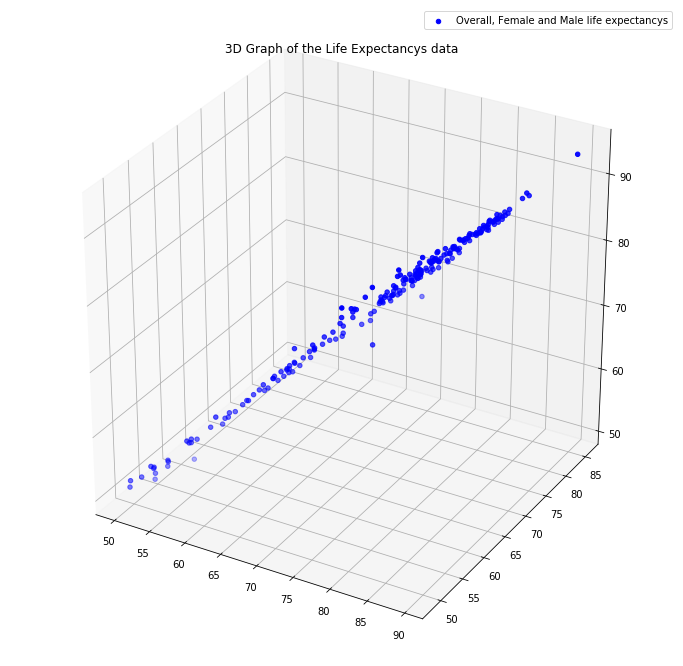

In [32]:
X = life.drop(['Country', 'Rank', 'Continent'], axis = 1).values
Y = life.drop(['Overall_Life','Male_Life','Female_Life', 'Continent', 'Continent_cat', 'Rank'], axis = 1).values
#
x1 = np.asarray(X[0:223,0],np.float)
y1 = np.asarray(X[0:223,1],np.float)  
z1 = np.asarray(X[0:223,2],np.float)  

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1,y1,z1,c='blue', label = "Overall, Female and Male life expectancys")

plt.title('3D Graph of the Life Expectancys data')
ax.legend()
plt.show()

In [33]:
xdata = [x for x in zip(life.Overall_Life, life.Male_Life,life.Female_Life, life.Continent_cat )]
ydata = [x for x in life.Country]

The distance function will use the euclidean formula to calculate the distance between given points.

In [34]:
def distance(p1,p2):
    size = len(p1)
    s = 0
    for i in range(size - 1):
        s += math.pow(p1[i] - p2[i], 2)
    return math.sqrt(s)

In [35]:
def KNN(p, features, labels, k):
    distance_array = [(features[i], labels[i], distance(p, features[i]))
                        for i in range(len(features))
                        if p != features[i]]
    distance_array.sort(key = lambda x : x[2])
    return distance_array[0:k]

KNN_results will give us the KNN prediction for our chosen country

Let's take a look at the dataframe and decide the country we want to test our KNN model on.

In [36]:
life.head(15)

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent,Continent_cat
0,1,Monaco,89.5,85.6,93.5,Europe,2
1,2,Japan,85.0,81.7,88.5,Asia,1
2,3,Singapore,85.0,82.3,87.8,Asia,1
3,4,Macau; China,84.5,81.6,87.6,Asia,1
4,5,San Marino,83.3,80.7,86.1,Europe,2
5,6,Iceland,83.0,80.9,85.3,Europe,2
6,7,"Hong Kong, China",82.9,80.3,85.8,Asia,1
7,8,Andorra,82.8,80.6,85.1,Europe,2
8,9,Switzerland,82.6,80.3,85.0,Europe,2
9,10,Guernsey,82.5,79.9,85.4,Europe,2


We will predict Israel. Let us look at the 3 closest countries.

In [37]:
results = KNN(xdata[10],xdata,ydata,3) #input what country you want to enter

def KNN_results(i,X_data,Y_data,k):
    for i in range(len(results)):
        print("Closest countries in relation to Life Expectancy = ", results[i][1])

KNN_results(10,xdata,ydata,3) #input the same information here

Closest countries in relation to Life Expectancy =  Sweden
Closest countries in relation to Life Expectancy =  Switzerland
Closest countries in relation to Life Expectancy =  Andorra


References:

https://stackoverflow.com/questions/48812580/python-pandas-unicodedecodeerror-utf-8-codec-cant-decode-byte-0xcd-in-pos

https://www.kaggle.com/amansaxena/lifeexpectancy

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn